<a href="https://colab.research.google.com/github/cjk-CODE/melee_ranked_blockchain/blob/main/protocol_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##setup environment

In [ ]:
#initialize notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
gdrive = GoogleDrive(gauth)
drive.mount('/content/drive/', force_remount=True)
path = '/content/drive/My Drive/ranked blockchain brainstorm/'

file_list = gdrive.ListFile(
    {'q': "'1ZE6tIuZ9DYaEvr3ng9AMLVVHcom283y2' in parents and trashed=False"}).GetList()

for i in range(len(file_list)):
  print(i,":", file_list[i]['title'])

Mounted at /content/drive/
0 : protocol.ipynb
1 : Settling_Ranking_Updates_for_Arbitrary_and_Consens (1)
2 : Settling_Ranking_Updates_for_Arbitrary_and_Consens (1).html
3 : BLOCKCHAIN SCHEMA
4 : potential attacks


#Classes

##client class

In [ ]:
class Slippi_Client:
  def __init__(self, , elo):
    

#Functions

##random_lat_lon()

In [ ]:
#generate a random lat/lon within US/MEXICO/CANADA

def random_lat_lon():
  lat = np.random.randint(7, 61)
  lon = np.random.randint(20, 180)
  return lat, lon

##lat_lon_distance()

In [ ]:
#return distance between 2 lat longs (in lat-lon) in miles

def lat_lon_distance(lat1, lon1, lat2, lon2):
    p = np.pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p) * np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p))/2
    return 7917.5117 * np.arcsin(np.sqrt(a)) #2*R*arcsin


##generate_connection_profile()

In [ ]:
import numpy as np

def generate_connection_profile(test_length=100000): #test_length is how many packets are simulated to generate profile
  base_ping = np.randint(20, 100)
  connection_profile = {"latency":[0,0,0,0], #smallest, largest, average measured, variance
                        "packet_loss_rate":0, #percent lost over entire connection
                        "burst_packet_loss":[0,0,0,0], #smallest, largest, average measured, variance. 1 min resolution
                        "round_trip_time": [0,0,0,0], #smallest, largest, average measured, variance
                        "out_of_order_packets": [0,0], #percentage of packets that weren't in order, Packet Reordering Index
                        "retransmission_rate": 0,
                        "bandwidth": [0,0,0], #overall, 1 min average, 1 min variance
                        "goodput": [0,0,0], # #overall, 1 min average, 1 min variance
                        "peak_bandwidth_utilization":0,
                        "queue_length": [0,0,0,0], ##smallest, largest, average measured, variance
                        "bandwidth_availability":0,
                        "network_efficiency":0,
                        "routing_distance":0,
                        "estimated_distance":0
                        }

  #assume latency related measurements are gamma distributions
  latency_k = np.random.uniformm(0.7, 2)
  latency_scale = np.random.uniform(1, 3)
  latency_graph = np.random.gamma(latency_k, latency_scale, test_length)


###Distribution Tests

####latency

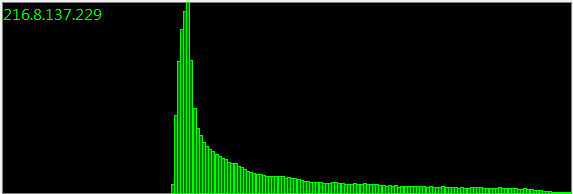

generic ping distribution

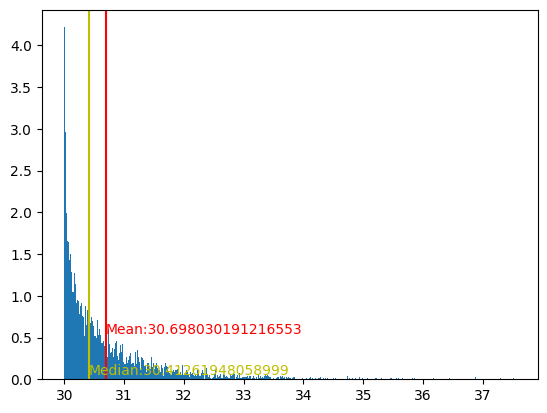

In [ ]:
#GOOD Latency (low-k, scale)  + lowest possible ms value as offset
#this is probably unrealistically good haha
#scale is approx std, so low scale is more stable
latency = np.random.gamma(.7, 1, 10000)+30
mean = np.mean(latency)
median = np.median(latency)
std= np.std(latency)
plt.hist(latency, bins=1000, density=True)
plt.axvline(mean, color='r', label='mean')
plt.axvline(median, color='y', label='median')
plt.text(x=mean, y=.9/(std*k), s='Mean:'+str(mean), color='r')
plt.text(x=median, y=.1/(std*k), s='Median:'+str(median), color='y')
plt.show()

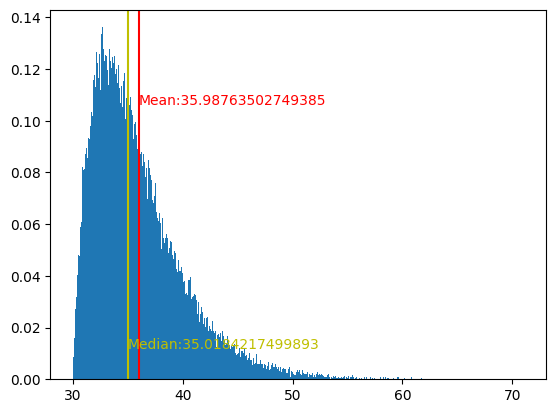

In [ ]:

#BAD Latency (high-k, high scale)  + lowest possible ms value as offset
#regular ping spikes of 50% mean latency
k= 2
scale = 3
latency = np.random.gamma(k, scale, 100000)+30
mean = np.mean(latency)
median = np.median(latency)
std= np.std(latency)
plt.hist(latency, bins=1000, density=True)
plt.axvline(mean, color='r', label='mean')
plt.axvline(median, color='y', label='median')
plt.text(x=mean, y=.9/(std*k), s='Mean:'+str(mean), color='r')
plt.text(x=median, y=.1/(std*k), s='Median:'+str(median), color='y')
plt.show()

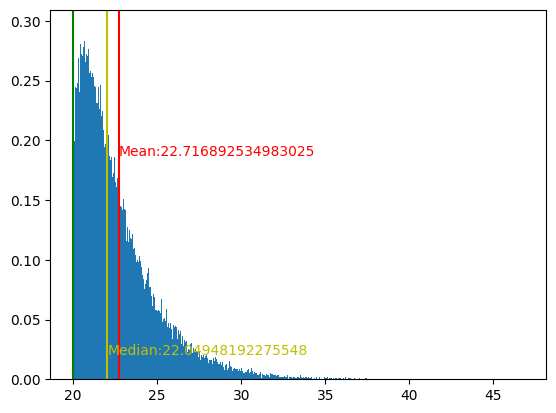

k:  1.2772537952840013 
scale:  2.127303598698826


In [ ]:
#generate random latency distribution
latency_k = np.random.uniform(0.7, 2)
latency_scale = np.random.uniform(1, 3)
base_ping = np.random.randint(20, 100)
latency_graph = np.random.gamma(latency_k, latency_scale, 100000)+base_ping

mean = np.mean(latency_graph)
median = np.median(latency_graph)
std= np.std(latency_graph)
plt.hist(latency_graph, bins=1000, density=True)
plt.axvline(mean, color='r', label='mean')
plt.axvline(median, color='y', label='median')
plt.axvline(base_ping, color='g')
plt.text(x=mean, y=.9/(std*k), s='Mean:'+str(mean), color='r')
plt.text(x=median, y=.1/(std*k), s='Median:'+str(median), color='y')
plt.show()

print('k: ', latency_k, '\nscale: ', latency_scale)

for a gamma distribution we will use 0.7 < k < 2 and 1 < theta < 3 to simulate acceptable latency

k in this scenario representing how often the ping spikes

theta representing the maximum possible ping spikes



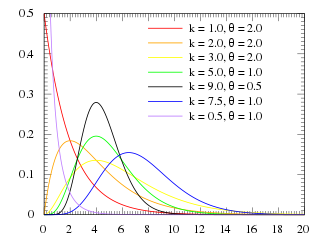